In [4]:
import tensorflow as tf
import numpy as np
import matplotlib

print(tf.__version__)

2.13.0


Loading the Fashion MNSIT dataset which is directly available in TensorFlow
The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. It consists of a training set of 60,000 images and a test set of 10,000 images. Each image is mapped to a single label from the following 10 classes:
- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

In [5]:
fmnist = tf.keras.datasets.fashion_mnist

In [6]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 6

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0  62  28   0   0   0   0   0   0   2  61  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 181 221 222  64  58 109  47  11  59 108  59  49 215 200 143   0   0   0   0   0   0]
 [  0   0   0   0   0   0 230 218 231 225 157   0   0  31  49  30   0   0 163 232 235 227 213   0   0   0   0   0]
 [  0   0   0   0   0  75 240 185 213 231 224 232  89   1  14  52 127 234 228 229 215 176 238 112   0   0   0   0]
 [  0   0   0   0   0 196 221 217 159 243 229 185 255 249 220 255 199 236 222 239 166 214 211 214   0   0   0   0]
 [  0   0   0   0  19 220 210 234 163 225 207 162 220 163 152 204 182 158 255 185 197 222 207 240 147   0   0   0]
 [  0   0   0   0   0 238 219 230 205 239 184 214 183 163 160 173 221 180 236 177 236 217 230 191   0   0   0   0]
 [  0   0   0   0   0  61 237 236 212 245 242 200 154 202 206 153 202 255 199 217 228 232 213   0   0   0   0   0]
 [  0   0   0   0   0   0  50 242 228 233 232 238 

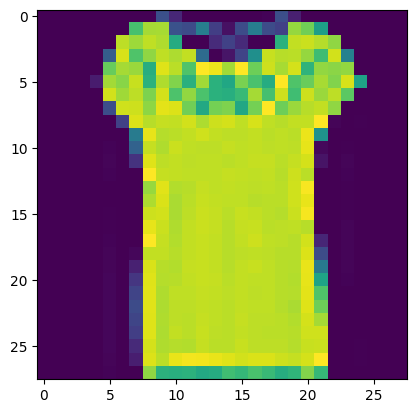

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 6632

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [12]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

Adding a callback to stop training at 90% accuracy

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
    
    if(logs.get('loss') < 0.4):
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

- `Sequential`: Defines sequence of layers in neural networks
- `Flatten`: Converts 28 x 28 2D array into a 1D array
- `Dense`: Adds a layer of neurons

Activation Functions
- `Relu`: If x > 0 return x, else return 0
- `Softmax`: Takes a set of values and picks the biggest one (probability). In our example, if biggest one is in index 4, then the label of image is 4

In [28]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [29]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 2s 809us/step - loss: 0.4929 - accuracy: 0.8252
Epoch 2/10
1825/1875 [============================>.] - ETA: 0s - loss: 0.3709 - accuracy: 0.8658
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 2s 827us/step - loss: 0.3717 - accuracy: 0.8655


Evaluating the model's performance on testing dataset

In [30]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 561us/step - loss: 0.3850 - accuracy: 0.8600


[0.3850407004356384, 0.8600000143051147]

Create a set of classification for each of the test images

In [31]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 1ms/step
[3.6783596e-05 9.0544563e-07 2.5116453e-05 7.8936580e-05 2.9542980e-05 1.6380265e-02 1.0681361e-04 6.8054788e-02 7.1403603e-03 9.0814650e-01]


## Convolutional Neural Network (CNN) for Fashion-MNIST Classification

In [32]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              